In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1835,ham,* Will be september by then!,NaN,NaN,NaN
2596,ham,No i'm not gonna be able to. || too late notic...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
2869,spam,YOUR CHANCE TO BE ON A REALITY FANTASY SHOW ca...,NaN,NaN,NaN
5029,ham,Is there coming friday is leave for pongal?do ...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. Data cleaning 
# 2. EDA
# 3.Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvements
# 7. Website
# 8. Deploy

# 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# to drop 3 columns 
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
3412,ham,Where do you need to go to get it?
2323,ham,Sorry dude. Dont know how i forgot. Even after...
4526,ham,Understand. his loss is my gain :) so do you w...
4600,spam,FreeMsg: Txt: CALL to No: 86888 & claim your r...
2153,ham,I dont have i shall buy one dear


In [9]:
# Renaming the cols v1 and v2
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2722,ham,It's justbeen overa week since we broke up and...
2362,ham,How are you doing? Hope you've settled in for ...
2195,ham,V-aluable. A-ffectionate. L-oveable. E-ternal....
1601,ham,Carlos is taking his sweet time as usual so le...
5311,ham,K.k:)i'm going to tirunelvali this week to see...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# to check missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# check for duplicate values
df.duplicated().sum()

403

In [15]:
# to remove duplicates
df = df.drop_duplicates(keep = 'first')


In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

# 2. EDA

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

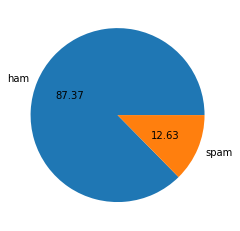

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts() , labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
# Data is imbalanced

In [22]:
import nltk

In [23]:
!pip install nltk

ERROR: Exception:
Traceback (most recent call last):
  File "c:\users\gedda\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "c:\users\gedda\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "c:\users\gedda\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "c:\users\gedda\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 483, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "c:\users\gedda\anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "c:\users\gedda\anaconda3\lib\site-packages\pip\_vendor\packaging\version.py", line 56, in parse
    return Version(version)
  File "c:\users\gedda\anaconda3\lib\site-packages

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gedda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['num_characters'] = df['text'].apply(len)

In [26]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#ham messages
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
#spam 
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [34]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

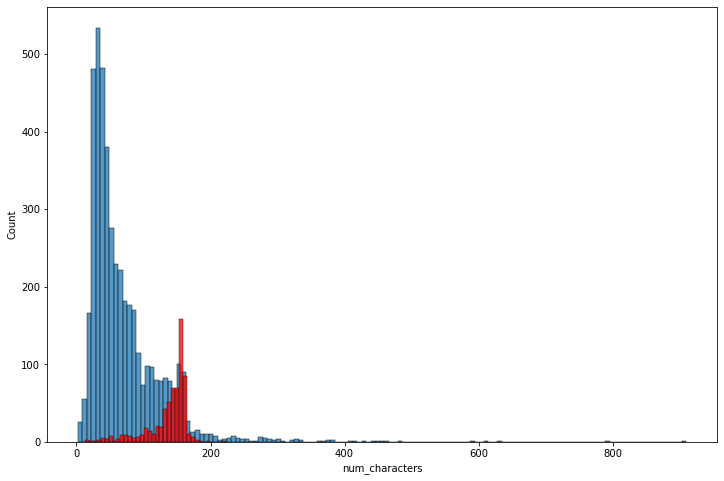

In [35]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

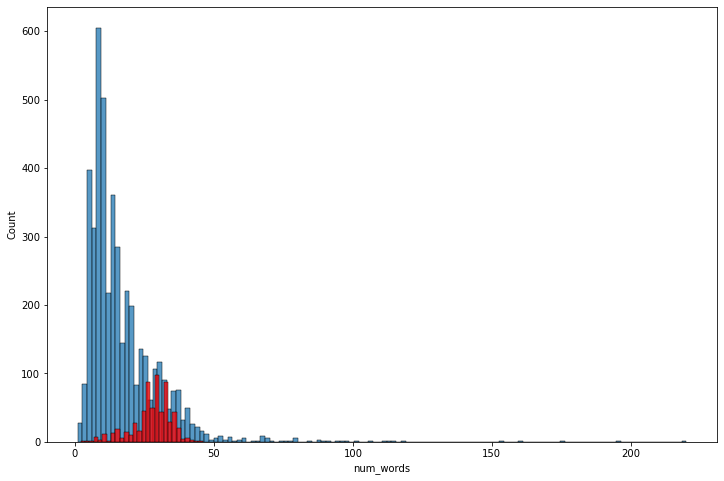

In [36]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

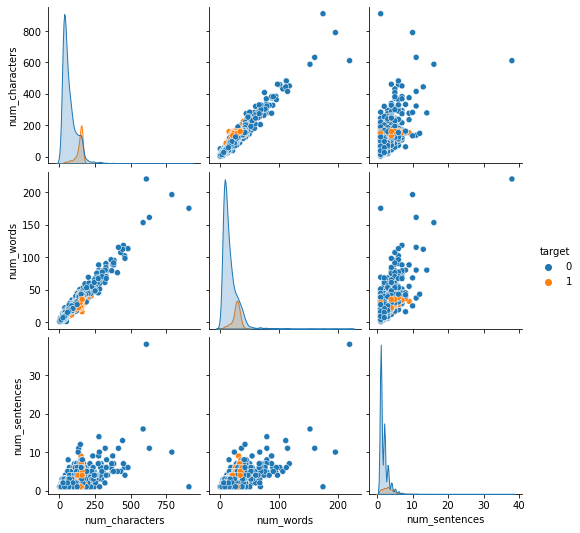

In [37]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

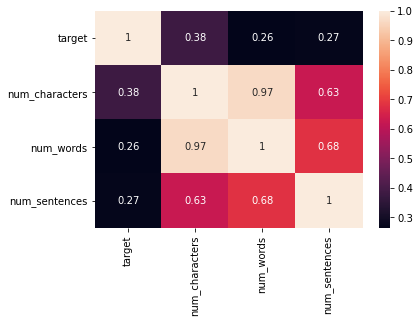

In [38]:
sns.heatmap(df.corr(),annot=True)

# 3.Data Preprocessing
 a.Lower case                                                                               
 b.Tokenization                                                                      
 c.Removing special characters                                                                              
 d.Removing stop words and punctuation                                                                   
 e.Stemming                                            
  

In [159]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

        

In [160]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [161]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [163]:
from nltk.stem import PorterStemmer

In [164]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [165]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [166]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [167]:
df['transformed_text'] = df['text'].apply(transform_text)

In [168]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [49]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\gedda\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "C:\Users\gedda\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "C:\Users\gedda\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "C:\Users\gedda\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 483, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "C:\Users\gedda\anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "C:\Users\gedda\anaconda3\lib\site-packages\pip\_vendor\packaging\version.py", line 56, in parse
    return Version(version)
  File "C:\Users\gedda\anaconda3\lib\site-packages

In [50]:
pip install --upgrade Pillow

Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\gedda\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "C:\Users\gedda\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "C:\Users\gedda\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "C:\Users\gedda\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 483, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "C:\Users\gedda\anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "C:\Users\gedda\anaconda3\lib\site-packages\pip\_vendor\packaging\version.py", line 56, in parse
    return Version(version)
  File "C:\Users\gedda\anaconda3\lib\site-packages

In [51]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\gedda\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "C:\Users\gedda\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "C:\Users\gedda\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "C:\Users\gedda\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 483, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "C:\Users\gedda\anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "C:\Users\gedda\anaconda3\lib\site-packages\pip\_vendor\packaging\version.py", line 56, in parse
    return Version(version)
  File "C:\Users\gedda\anaconda3\lib\site-packages

In [52]:
import matplotlib.pyplot as plt

In [53]:
from wordcloud import WordCloud



In [54]:
spam_text = df[df['target'] == 1]['transformed_text'].str.cat(sep=" ")

In [55]:
font_path = 'C:/Windows/Fonts/arial.ttf'

In [56]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white',font_path=font_path)

In [57]:
wc.generate(spam_text)


In [58]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

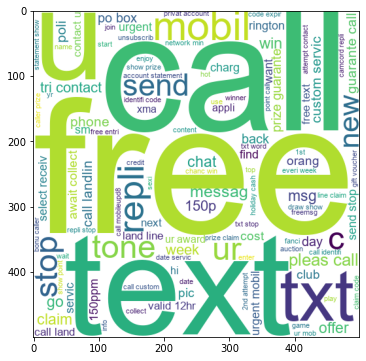

In [59]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [60]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

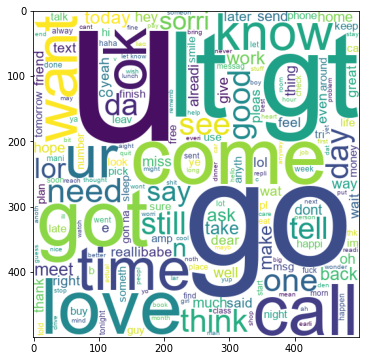

In [61]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [62]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)
        

In [63]:
len(spam_corpus)

9941

C:\Users\gedda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

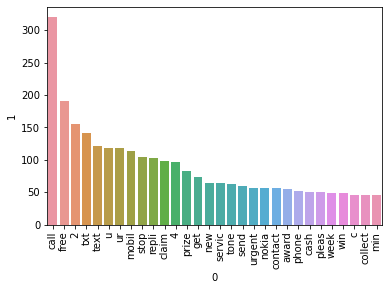

In [64]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show

In [65]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [66]:
len(ham_corpus)

0

In [67]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show

KeyError: 0

 # 4.Model Building

In [193]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf = TfidfVectorizer()

In [194]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

KeyError: 'transformed_text'

In [195]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [196]:
# appending the num character col to X
X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

KeyError: 'num_characters'

In [197]:
X.shape

(5572, 8404)

In [198]:
y = df['target'].values

KeyError: 'target'

In [199]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5572, dtype: int64

In [200]:
from sklearn.model_selection import train_test_split

In [201]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [202]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [203]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()



In [204]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

In [205]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9614349775784753
[[957   0]
 [ 43 115]]
1.0


In [206]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9748878923766816
[[956   1]
 [ 27 131]]
0.9924242424242424


In [207]:
#tfidf --> MNB

In [208]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [209]:
svc = SVC(kernel='sigmoid',gamma=0.1)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='11')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [210]:
svc = SVC()          # Support Vector Classifier
knc = KNeighborsClassifier()  # K-Nearest Neighbors Classifier
mnb = MultinomialNB() # Naive Bayes
dtc = DecisionTreeClassifier() # Decision Tree
lrc = LogisticRegression() # Logistic Regression
rfc = RandomForestClassifier() # Random Forest
abc = AdaBoostClassifier() # AdaBoost
bc = BaggingClassifier()  # Bagging Classifier
etc = ExtraTreesClassifier() # Extra Trees Classifier
gbdt = GradientBoostingClassifier()

In [211]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt
}

In [212]:
pip install --upgrade scikit-learn threadpoolctl numpy

  Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl.metadata (5.6 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\gedda\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "C:\Users\gedda\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "C:\Users\gedda\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "C:\Users\gedda\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 483, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "C:\Users\gedda\anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "C:\Users\gedda\anaconda3\lib\site-packages\pip\_vendor\packaging\version.py", line 56, in parse
    return Version(version)
  File "C:\Users\gedda\anaconda3\lib\site-packages

In [213]:
from sklearn.metrics import accuracy_score, precision_score

In [214]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [215]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.957847533632287, 0.9911504424778761)

In [216]:
pip install --upgrade scikit-learn numpy threadpoolctl

  Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl.metadata (5.6 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\gedda\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "C:\Users\gedda\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "C:\Users\gedda\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "C:\Users\gedda\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 483, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "C:\Users\gedda\anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "C:\Users\gedda\anaconda3\lib\site-packages\pip\_vendor\packaging\version.py", line 56, in parse
    return Version(version)
  File "C:\Users\gedda\anaconda3\lib\site-packages

In [137]:
accuracy_scores = []
precision_scores = []
algorithms = []

for name, clf in clfs.items():
    try:
        current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
        print(f"For {name}")
        print(f"Accuracy - {current_accuracy}")
        print(f"Precision - {current_precision}")
        
        accuracy_scores.append(current_accuracy)
        precision_scores.append(current_precision)
        algorithms.append(name)  # Append only when successful
        
    except Exception as e:
        print(f"Error with {name}: {e}")

# Creating DataFrame with equal-length lists
performance_df = pd.DataFrame({
    'Algorithms': algorithms, 
    'Accuracy': accuracy_scores, 
    'Precision': precision_scores
})



C:\Users\gedda\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For SVC
Accuracy - 0.8665377176015474
Precision - 0.0
For KN
Accuracy - 0.9264990328820116
Precision - 0.7818181818181819
For NB
Accuracy - 0.867504835589942
Precision - 1.0
For DT
Accuracy - 0.9545454545454546
Precision - 0.8137931034482758
For LR
Accuracy - 0.9555125725338491
Precision - 0.9791666666666666
For RF
Accuracy - 0.9709864603481625
Precision - 1.0
For AdaBoost
Accuracy - 0.97678916827853
Precision - 0.9596774193548387
For BgC
Accuracy - 0.9622823984526112
Precision - 0.889763779527559
For ETC
Accuracy - 0.9758220502901354
Precision - 0.9747899159663865
For GBDT
Accuracy - 0.9584139264990329
Precision - 0.9279279279279279


In [138]:
performance_df

,Algorithms,Accuracy,Precision
0,SVC,0.866538,0.000000
1,KN,0.926499,0.781818
2,NB,0.867505,1.000000
3,DT,0.954545,0.813793
4,LR,0.955513,0.979167
5,RF,0.970986,1.000000
6,AdaBoost,0.976789,0.959677
7,BgC,0.962282,0.889764
8,ETC,0.975822,0.974790
9,GBDT,0.958414,0.927928


In [139]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithms")

In [140]:
performance_df1

,Algorithms,variable,value
0,SVC,Accuracy,0.866538
1,KN,Accuracy,0.926499
2,NB,Accuracy,0.867505
3,DT,Accuracy,0.954545
4,LR,Accuracy,0.955513
5,RF,Accuracy,0.970986
6,AdaBoost,Accuracy,0.976789
7,BgC,Accuracy,0.962282
8,ETC,Accuracy,0.975822
9,GBDT,Accuracy,0.958414


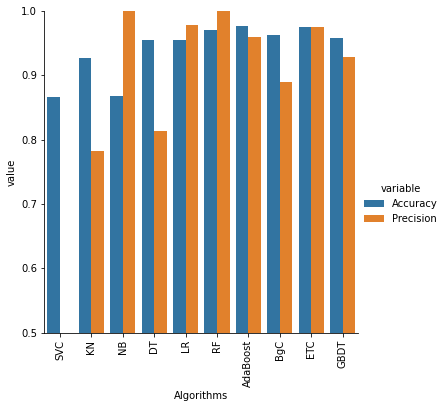

In [141]:
sns.catplot(x='Algorithms', y='value',
           hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [142]:
# model improve 
# 1. Change the max_features parameter of TfIdf

In [143]:
temp_df = pd.DataFrame({'Algorithms':clfs.keys(),'Accurancy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})

In [144]:
accuracy_scores = []
precision_scores = []
algorithms = []  # List to hold the names of classifiers with successful runs

for name, clf in clfs.items():
    try:
        # Attempt to train the classifier and get the scores
        current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
        print(f"For {name}: Accuracy - {current_accuracy}, Precision - {current_precision}")
        
        # Only append the values if the classifier runs successfully
        accuracy_scores.append(current_accuracy)
        precision_scores.append(current_precision)
        algorithms.append(name)  # Store the successful algorithm name
    
    except Exception as e:
        print(f"Error with {name}: {e}")

# Create the DataFrame now with equal-length lists
temp_df = pd.DataFrame({
    'Algorithms': algorithms,  # This now has only the successful algorithms
    'Accuracy_max_ft_3000': accuracy_scores,
    'Precision_max_ft_3000': precision_scores
})


C:\Users\gedda\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For SVC: Accuracy - 0.8665377176015474, Precision - 0.0
For KN: Accuracy - 0.9264990328820116, Precision - 0.7818181818181819
For NB: Accuracy - 0.867504835589942, Precision - 1.0
For DT: Accuracy - 0.9574468085106383, Precision - 0.8357142857142857
For LR: Accuracy - 0.9555125725338491, Precision - 0.9791666666666666
For RF: Accuracy - 0.9729206963249516, Precision - 1.0
For AdaBoost: Accuracy - 0.97678916827853, Precision - 0.9596774193548387
For BgC: Accuracy - 0.9632495164410058, Precision - 0.8846153846153846
For ETC: Accuracy - 0.9748549323017408, Precision - 0.9745762711864406
For GBDT: Accuracy - 0.9555125725338491, Precision - 0.9181818181818182


In [145]:
accuracy_scores = []
precision_scores = []
successful_clfs = []  # To store the names of classifiers with successful results

for name, clf in clfs.items():
    try:
        # Attempt to train the classifier and get the scores
        current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
        print(f"For {name}: Accuracy - {current_accuracy}, Precision - {current_precision}")
        
        # Append the scores and classifier name if successful
        accuracy_scores.append(current_accuracy)
        precision_scores.append(current_precision)
        successful_clfs.append(name)
    
    except Exception as e:
        # Handle any errors that arise during training and prediction
        print(f"Error with {name}: {e}")

# Create the DataFrame with only the successful classifiers
temp_df = pd.DataFrame({
    'Algorithms': successful_clfs,  # This now has only successful algorithms
    'Accuracy_scaling': accuracy_scores,
    'Precision_scaling': precision_scores
})

# Output the DataFrame to ensure it's created correctly
print(temp_df)


C:\Users\gedda\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For SVC: Accuracy - 0.8665377176015474, Precision - 0.0
For KN: Accuracy - 0.9264990328820116, Precision - 0.7818181818181819
For NB: Accuracy - 0.867504835589942, Precision - 1.0
For DT: Accuracy - 0.9564796905222437, Precision - 0.8251748251748252
For LR: Accuracy - 0.9555125725338491, Precision - 0.9791666666666666
For RF: Accuracy - 0.9738878143133463, Precision - 1.0
For AdaBoost: Accuracy - 0.97678916827853, Precision - 0.9596774193548387
For BgC: Accuracy - 0.960348162475822, Precision - 0.888
For ETC: Accuracy - 0.97678916827853, Precision - 0.975
For GBDT: Accuracy - 0.9564796905222437, Precision - 0.918918918918919
  Algorithms  Accuracy_scaling  Precision_scaling
0        SVC          0.866538           0.000000
1         KN          0.926499           0.781818
2         NB          0.867505           1.000000
3         DT          0.956480           0.825175
4         LR          0.955513           0.979167
5         RF          0.973888           1.000000
6   AdaBoost     

In [146]:
new_df = performance_df.merge(temp_df, on='Algorithms')

In [147]:
new_df_scaled = new_df.merge(temp_df, on='Algorithms')

In [148]:
new_df_scaled

,Algorithms,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y
0,SVC,0.866538,0.000000,0.866538,0.000000,0.866538,0.000000
1,KN,0.926499,0.781818,0.926499,0.781818,0.926499,0.781818
2,NB,0.867505,1.000000,0.867505,1.000000,0.867505,1.000000
3,DT,0.954545,0.813793,0.956480,0.825175,0.956480,0.825175
4,LR,0.955513,0.979167,0.955513,0.979167,0.955513,0.979167
5,RF,0.970986,1.000000,0.973888,1.000000,0.973888,1.000000
6,AdaBoost,0.976789,0.959677,0.976789,0.959677,0.976789,0.959677
7,BgC,0.962282,0.889764,0.960348,0.888000,0.960348,0.888000
8,ETC,0.975822,0.974790,0.976789,0.975000,0.976789,0.975000
9,GBDT,0.958414,0.927928,0.956480,0.918919,0.956480,0.918919


In [149]:
#Voting Classifier
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [150]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [151]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [152]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.867504835589942
Precision 1.0


In [153]:
# Applying stacking
estimators = [('svm',svc),('nb',mnb),('et',etc)]
final_estimator = RandomForestClassifier()

In [154]:
from sklearn.ensemble import StackingClassifier

In [155]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [156]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9777562862669246
Precision 0.952755905511811


In [158]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))




In [184]:
import pickle

# Load the vectorizer and model
tfidf = pickle.load(open('vectorizer.pkl', 'rb'))
model = pickle.load(open('model.pkl', 'rb'))

# Check the number of features in the vectorizer
n_features_tfidf = len(tfidf.get_feature_names_out())
print(f"Number of features in vectorizer: {n_features_tfidf}")

# Check the model's feature log probabilities
n_features_model = model.feature_log_prob_.shape[1]
print(f"Number of features expected by model: {n_features_model}")


Number of features in vectorizer: 6677


AttributeError: 'MultinomialNB' object has no attribute 'feature_log_prob_'

In [190]:
print(type(model))


<class 'sklearn.naive_bayes.MultinomialNB'>


In [191]:
if hasattr(model, 'class_count_'):
    print("The model is trained.")
else:
    print("The model is not trained.")


The model is trained.


In [192]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import pickle

# Step 1: Load the dataset
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

# Rename columns for simplicity
df.columns = ['label', 'message', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
df = df[['label', 'message']]

# Step 2: Preprocess the data
df['label'] = df['label'].map({'ham': 0, 'spam': 1})  # Convert labels to binary

# Step 3: Transform the messages using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df['message'])  # Vectorized messages
y = df['label']  # Binary labels

# Step 4: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the MultinomialNB model
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 6: Save the trained model and vectorizer
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)

print("Model and vectorizer saved successfully!")


Model and vectorizer saved successfully!
